In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import cv2
from IPython.display import display, Image
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Matrix.csv')

In [ ]:
ratings_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ratings.csv')

In [ ]:
books_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Books.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

df

,User-ID,country
0,1,1
1,2,0
2,3,0
3,4,10
4,5,3
...,...,...
278853,278854,1
278854,278855,3
278855,278856,2
278856,278857,1


In [ ]:
df.set_index('User-ID', inplace = True)

In [ ]:
ratings_data.shape[0]

1149780

In [ ]:
ratings_data = ratings_data[ratings_data['Book-Rating'] != 0]

In [ ]:
ratings_data


,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
len(list(ratings_data['User-ID'].unique()))

77805

In [ ]:
((ratings_data['User-ID'].value_counts()))

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
232692       1
181469       1
193755       1
171222       1
20086        1
Name: User-ID, Length: 77805, dtype: int64

In [ ]:
def user_history(userid):
  user_account = {}
  for book in list(ratings_data[ratings_data['User-ID']==userid]['ISBN']):
    user_account[book] =int(ratings_data[ratings_data['User-ID']==userid][ratings_data['ISBN']==book]['Book-Rating'])
  return user_account

In [ ]:
!pip install shutup
import shutup; shutup.please()

In [ ]:
user_groupbybook = ratings_data.groupby('ISBN')

In [ ]:
def simmilar_user_data(user_id):
  account = user_history(user_id)
  return pd.concat([group for (name,group) in user_groupbybook if name in list(account.keys())])

In [ ]:
def fine_data(user_id):
  simmilar = simmilar_user_data(user_id)
  simmilar = simmilar.pivot(values='Book-Rating', columns='ISBN', index = 'User-ID')
  simmilar['country'] = (df.iloc[list(simmilar.index-1)])
  return simmilar.fillna(0)

In [ ]:
def recommend(user_id):
  fine = fine_data(user_id)
  if fine.shape[0]<5:
    n_neigbh = fine.shape[0]
  else:
    n_neigbh = 5
  nbrs = NearestNeighbors(n_neighbors=n_neigbh, algorithm= 'kd_tree').fit(fine)
  distance,indices = nbrs.kneighbors(fine)
  k = fine.reset_index()
  ind = (indices[(k[k['User-ID']== user_id].index)]).flatten()
  friends =  list(k.iloc[ind[1:]]['User-ID'])

  recommendations = pd.concat([pd.DataFrame(list(user_history(friend).items())) for friend  in friends])
  return recommendations

In [ ]:
def recommend_books(user_id):
  kam_ka_data = recommend(user_id)
  kam_ka_data = kam_ka_data.groupby(0).describe()[1]
  kam_ka_data = kam_ka_data[['count', 'mean']]
  user_can_like = kam_ka_data[kam_ka_data['mean']>6].sort_values(by='count', ascending=False)
  books_recommended = list(user_can_like.head(5).index)
  urls=[]
  names=[]
  for book in books_recommended:
    urls.append(list(books_data[books_data['ISBN']==book]['Image-URL-M'])[0])
    names.append(books_data[books_data['ISBN']==book]['Book-Title'])
  

  for url in urls :
      display(Image(url))
      
  return names

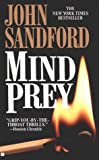

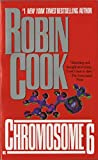

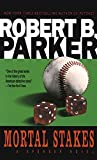

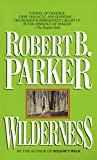

[2851    Phantoms
 Name: Book-Title, dtype: object, 20723    Mind Prey
 Name: Book-Title, dtype: object, 1854    Chromosome 6
 Name: Book-Title, dtype: object, 9867    Mortal Stakes
 Name: Book-Title, dtype: object, 25002    Wilderness
 Name: Book-Title, dtype: object]

In [ ]:
recommend_books(20086)

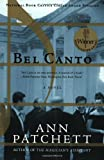

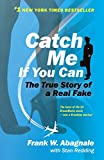

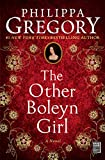

[1485    Bel Canto: A Novel
 Name: Book-Title, dtype: object, 21361    SUMMER/GERMAN SOLDIE
 Name: Book-Title, dtype: object, 28937    Christmas Carol
 Name: Book-Title, dtype: object, 4017    Catch Me If You Can: The True Story of a Real ...
 Name: Book-Title, dtype: object, 8406    The Other Boleyn Girl
 Name: Book-Title, dtype: object]

In [ ]:
recommend_books(232692)

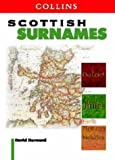

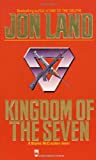

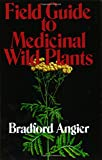

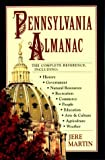

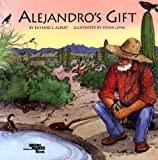

[113306    Scottish Surnames
 Name: Book-Title, dtype: object, 112644    Kingdom of the Seven
 Name: Book-Title, dtype: object, 113096    Field Guide to Medicinal Wild Plants
 Name: Book-Title, dtype: object, 113054    Pennsylvania Almanac
 Name: Book-Title, dtype: object, 113089    Alejandro's Gift
 Name: Book-Title, dtype: object]

In [ ]:
recommend_books(276721)
